In [1]:
import json
import math
import numpy as np
import scipy.stats
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 22})

In [2]:
with open('results/keyboard shortcuts.json') as f:
    keyboard = json.load(f)
    
with open('results/keyslide.json') as f:
    keyslide = json.load(f)

In [3]:
def get_angle(cursor, target):
    dx = target[0] - cursor[0]
    dy = target[1] - cursor[1]
    return math.atan2(dy, dx)

def get_distance(cursor, target):
    dx = target[0] - cursor[0]
    dy = target[1] - cursor[1]
    return math.sqrt(dx*dx + dy*dy)

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    print(m, " +- ", h)
    return m, m-h, m+h

# Number of Strokes/Gestures Required

In [4]:
angles1 = []
distances1 = []
number_of_gestures1 = []

angles2 = []
distances2 = []
number_of_gestures2 = []

for i in keyslide:
    angles1.append(get_angle(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    distances1.append(get_distance(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    number_of_gestures1.append(len(keyslide[i]["actionSequence"]))
  
    angles2.append(get_angle(keyboard[i]['cursorPos'], keyboard[i]['markerPos']))
    distances2.append(get_distance(keyboard[i]['cursorPos'], keyboard[i]['markerPos']))
    number_of_gestures2.append(len(keyboard[i]["actionSequence"]))

print('KeySlide')
print(np.mean(number_of_gestures1), ' +- ', np.std(number_of_gestures1, ddof=1))
print()
print('Keyboard')
print(np.mean(number_of_gestures2), ' +- ', np.std(number_of_gestures2, ddof=1))


x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(angles1)):
    x1.append(distances1[i]*math.cos(angles1[i]))
    y1.append(distances1[i]*math.sin(angles1[i]))
    x2.append(distances2[i]*math.cos(angles2[i]))
    y2.append(distances2[i]*math.sin(angles2[i]))

KeySlide
4.9403821146343905  +-  4.083787176275552

Keyboard
28.546864059217764  +-  18.822785349627534


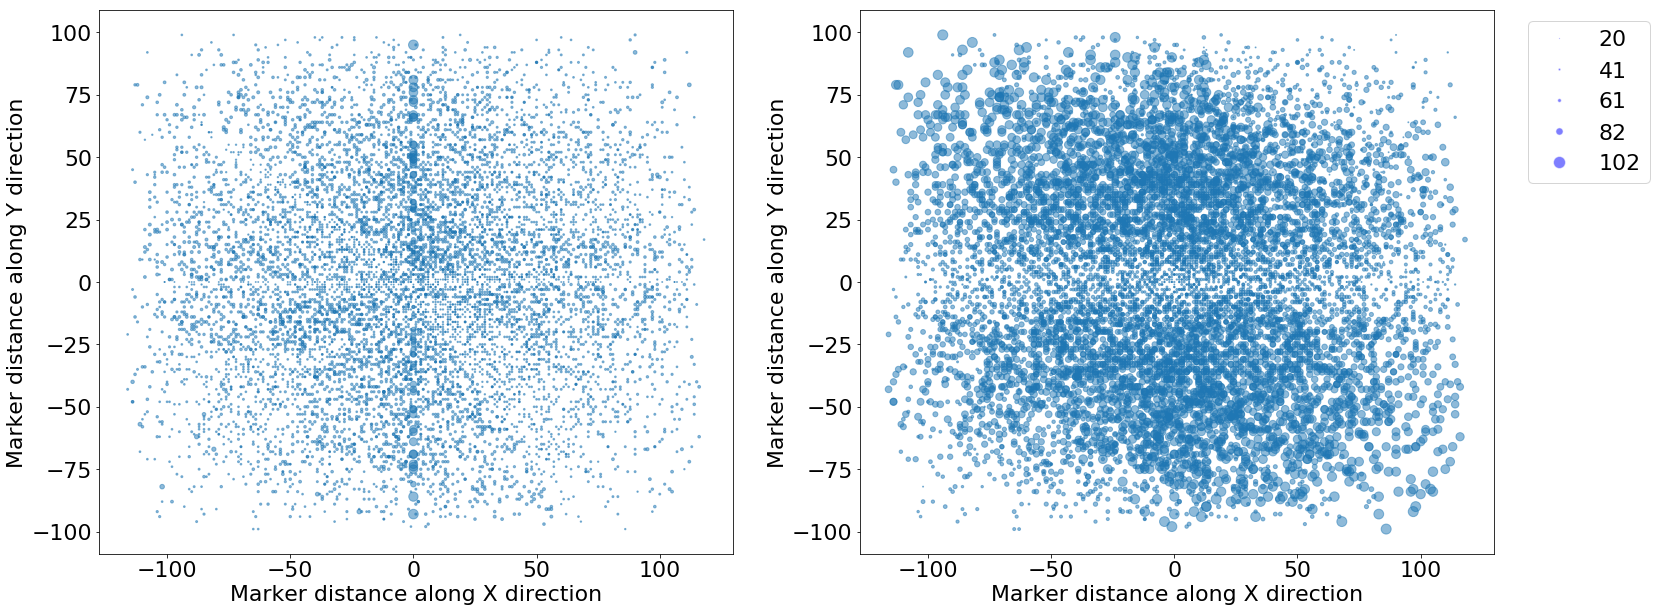

In [5]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [25, 10]

cm = plt.cm.get_cmap('PuRd')

data1 = number_of_gestures1
data2 = number_of_gestures2

max_value = max(data1 + data2)

fig, axes = plt.subplots(nrows=1, ncols=2)
p1 = axes.flat[0].scatter(x1, y1, s=data1, vmin=0, vmax=max_value, cmap=cm, alpha=0.5)
axes.flat[0].set_xlabel("Marker distance along X direction")
axes.flat[0].set_ylabel("Marker distance along Y direction")
p2 = axes.flat[1].scatter(x2, y2, s=data2, vmin=0, vmax=max_value, cmap=cm, alpha=0.5)
axes.flat[1].set_xlabel("Marker distance along X direction")
axes.flat[1].set_ylabel("Marker distance along Y direction")


line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=1.2, markerfacecolor="blue", alpha=0.5)
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=2.4, markerfacecolor="blue", alpha=0.5)
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=3.6, markerfacecolor="blue", alpha=0.5)
line4 = Line2D(range(1), range(1), color="white", marker='o', markersize=7.2,markerfacecolor="blue", alpha=0.5)
line5 = Line2D(range(1), range(1), color="white", marker='o', markersize=12,markerfacecolor="blue", alpha=0.5)
plt.legend((line1,line2,line3,line4,line5),(round(0.2*max_value),round(0.4*max_value), round(0.6*max_value), round(0.8*max_value), round(1*max_value)), numpoints=1, loc='upper center', bbox_to_anchor=(1.15, 1))

plt.show()
fig.savefig("graphs/simulation_strokes.pdf", bbox_inches='tight')

### KeySlide Distance After First Gesture in Long Mode

In [6]:
angles1 = []
distances1 = []
offset1 = []
offset2 = []

for i in keyslide:
    angles1.append(get_angle(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    distances1.append(get_distance(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    
    for j in range(len(keyslide[i]["actionSequence"])):
        if j == 0:      
            if keyslide[i]["actionSequence"][0][0] == 'keySlide':
                offset1.append(get_distance(keyslide[i]['markerPos'], keyslide[i]["actionSequence"][0][2]))
        else:
             if keyslide[i]["actionSequence"][j][0] == 'keySlide':
                offset2.append(get_distance(keyslide[i]['markerPos'], keyslide[i]["actionSequence"][j][2]))
                
print('KeySlide Distance After First Stroke')
print(np.mean(offset1), ' +- ', np.std(offset1, ddof=1))



print('KeySlide Distance After Second Stroke')
print(np.mean(offset2), ' +- ', np.std(offset2, ddof=1))



x1 = []
y1 = []

for i in range(len(angles1)):
    x1.append(distances1[i]*math.cos(angles1[i]))
    y1.append(distances1[i]*math.sin(angles1[i]))

KeySlide Distance After First Stroke
24.94884074764411  +-  20.24339717668003
KeySlide Distance After Second Stroke
6.569703042418029  +-  11.404721087453279


### Short Mode Number of Gestures

In [7]:
keystrokes = []

for i in keyslide:

    short = 0
    if len(keyslide[i]["actionSequence"]) > 0:
        for j in keyslide[i]["actionSequence"]:
            if j[0] != 'keySlide':
                short += 1
                
    keystrokes.append(short)

print('KeySlide: number of gestures in short mode')
print(np.mean(keystrokes), ' +- ', np.std(keystrokes, ddof=1))

KeySlide: number of gestures in short mode
2.7664299289786936  +-  4.2909819853940325


### Long Mode Number of Gestures

In [8]:
keystrokes = []

for i in keyslide:

    short = 0
    if len(keyslide[i]["actionSequence"]) > 0:
        for j in keyslide[i]["actionSequence"]:
            if j[0] == 'keySlide':
                short += 1
                
    keystrokes.append(short)

print('KeySlide number of gestures in long mode')
print(np.mean(keystrokes), ' +- ', np.std(keystrokes, ddof=1))

KeySlide number of gestures in long mode
2.173952185655697  +-  0.7369307577317904


# Time

Time it takes  to reposition the cursor

In [9]:
# time taken for a single keypress
tk = 200

angles1 = []
distances1 = []
time1 = []

angles2 = []
distances2 = []
time2 = []

for i in keyslide:
    angles1.append(get_angle(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    distances1.append(get_distance(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    t = 0
    for a in keyslide[i]["actionSequence"]:
        if keyslide[i]["actionSequence"][0][0] == 'keySlide':
            t += keyslide[i]["actionSequence"][0][3]
        else:
            t += tk
            
    time1.append(t/1000)
    
    angles2.append(get_angle(keyboard[i]['cursorPos'], keyboard[i]['markerPos']))
    distances2.append(get_distance(keyboard[i]['cursorPos'], keyboard[i]['markerPos']))
    time2.append(len(keyboard[i]["actionSequence"])*tk/1000)
    
print('KeySlide: average time spent to complete the task')
print(np.mean(time1), ' +- ', np.std(time1, ddof=1))
print("Total: ", np.sum(time1))

print('Keyboard: average time spent to complete the task')
print(np.mean(time2), ' +- ', np.std(time2, ddof=1))
print("Total: ", np.sum(time2))



x1 = []
y1 = []
x2 = []
y2 = []
for i in range(len(angles1)):
    x1.append(distances1[i]*math.cos(angles1[i]))
    y1.append(distances1[i]*math.sin(angles1[i]))
    x2.append(distances2[i]*math.cos(angles2[i]))
    y2.append(distances2[i]*math.sin(angles2[i]))

print()
print("T-test")
print(stats.ttest_ind(time1, time2, equal_var=False))

KeySlide: average time spent to complete the task
2.73667944361141  +-  1.8331613706449472
Total:  27358.584397783266
Keyboard: average time spent to complete the task
5.709372811843553  +-  3.7645570699255066
Total:  57076.600000000006

T-test
Ttest_indResult(statistic=-70.98468180508924, pvalue=0.0)


In [10]:
angles1 = []
distances1 = []
timeShort = []
timeLong = []
for i in keyslide:
    angles1.append(get_angle(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    distances1.append(get_distance(keyslide[i]['cursorPos'], keyslide[i]['markerPos']))
    ts = 0
    tl = 0
    for a in keyslide[i]["actionSequence"]:
        if keyslide[i]["actionSequence"][0][0] == 'keySlide':
            tl += keyslide[i]["actionSequence"][0][3]
        else:
            ts += tk
    timeShort.append(ts/1000)
    timeLong.append(tl/1000)
    
print('KeySlide: average time spent in short mode')
print(np.mean(timeShort), ' +- ', np.std(timeShort, ddof=1))
    
print('KeySlide: average time spent in long mode')
print(np.mean(timeLong), ' +- ', np.std(timeLong, ddof=1))

KeySlide: average time spent in short mode
0.06910073021906572  +-  0.812370912918803
KeySlide: average time spent in long mode
2.6675787133923445  +-  1.7519230193626258


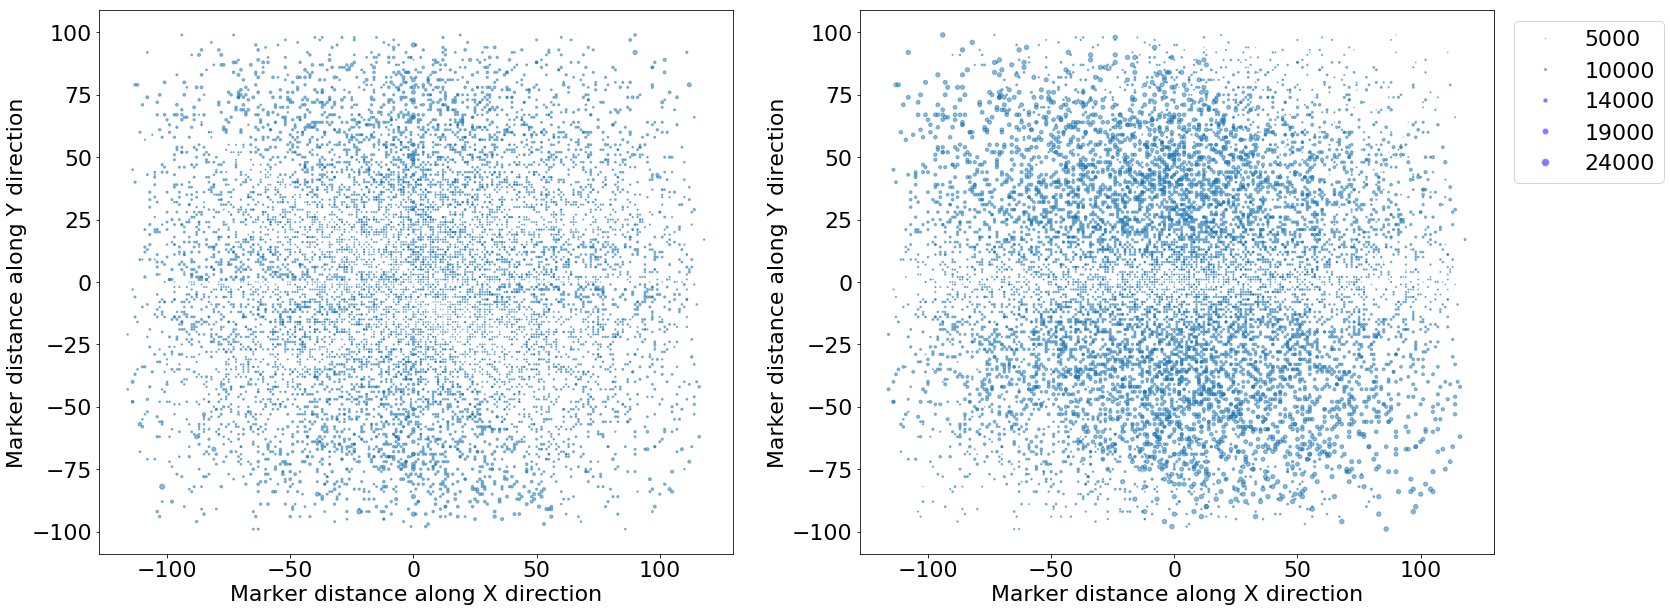

In [11]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [25, 10]

cm = plt.cm.get_cmap('Blues')

data1 = time1
data2 = time2

max_value = max(data1 + data2)

fig, axes = plt.subplots(nrows=1, ncols=2)
p1 = axes.flat[0].scatter(x1, y1, s=data1, vmin=0, vmax=max_value, cmap=cm, alpha=0.5)
axes.flat[0].set_xlabel("Marker distance along X direction")
axes.flat[0].set_ylabel("Marker distance along Y direction")
p2 = axes.flat[1].scatter(x2, y2, s=data2, vmin=0, vmax=max_value, cmap=cm, alpha=0.5)
axes.flat[1].set_xlabel("Marker distance along X direction")
axes.flat[1].set_ylabel("Marker distance along Y direction")

line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=1.6, markerfacecolor="blue", alpha=0.5)
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=3.2, markerfacecolor="blue", alpha=0.5)
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=4.8, markerfacecolor="blue", alpha=0.5)
line4 = Line2D(range(1), range(1), color="white", marker='o', markersize=6.4,markerfacecolor="blue", alpha=0.5)
line5 = Line2D(range(1), range(1), color="white", marker='o', markersize=8,markerfacecolor="blue", alpha=0.5)
plt.legend((line1,line2,line3,line4,line5),(round(0.2*max_value)*1000,round(0.4*max_value)*1000, round(0.6*max_value)*1000, round(0.8*max_value)*1000, round(1*max_value)*1000), numpoints=1, loc='upper center', bbox_to_anchor=(1.15, 1))

plt.show()
fig.savefig("graphs/simulation_time.pdf", bbox_inches='tight')